<a href="https://colab.research.google.com/github/jordlim/ecs171project/blob/main/occupancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECS 171 Group Project**

Members:

- Jamie Wu
- Jordan Lim
- Rohan Arumugam
- Elson Jian
- Hyunkyong (HK) Boo
- Juntao Wang



In [ ]:
# Imports - may or may not need all of these
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Occupancy_Estimation.csv")

 # Check for duplicated values and drop them if necessary
df = df.drop_duplicates(subset = ['Date', 'Time'])

In [ ]:
# Checks if there are any na values
df.isna().any()

Date                    False
Time                    False
S1_Temp                 False
S2_Temp                 False
S3_Temp                 False
S4_Temp                 False
S1_Light                False
S2_Light                False
S3_Light                False
S4_Light                False
S1_Sound                False
S2_Sound                False
S3_Sound                False
S4_Sound                False
S5_CO2                  False
S5_CO2_Slope            False
S6_PIR                  False
S7_PIR                  False
Room_Occupancy_Count    False
dtype: bool

In [ ]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


From df.isna(), we determine that there are no missing values.

From df.describe(), we see the ranges of our data as well as potential outliers.

- Temp: Consistenly around 25 / 26
- Light: Large outliers
- Sound: Relatively low data
- CO2: Large outliers
- PIR: Binary values, can use to confirm theories

In [ ]:
for i in df:
    print(df[i].value_counts())

# gets value counts for each column in dataset
# This provides us information on the distribution

2017/12/23    2779
2017/12/25    1716
2017/12/22    1462
2017/12/24    1064
2017/12/26    1063
2018/01/11    1048
2018/01/10     997
Name: Date, dtype: int64
10:49:41    1
21:43:16    1
21:39:42    1
21:40:13    1
21:40:43    1
           ..
16:31:37    1
16:32:07    1
16:32:38    1
16:33:09    1
09:00:09    1
Name: Time, Length: 10129, dtype: int64
25.44    1132
25.19    1108
25.38    1024
25.06     995
25.13     980
25.31     860
25.25     703
25.50     293
25.94     292
26.25     268
26.19     268
25.56     246
25.81     244
26.06     232
25.88     231
25.69     226
25.63     207
26.00     193
26.13     173
25.75     165
26.31     143
25.00     125
26.38      19
24.94       2
Name: S1_Temp, dtype: int64
25.44    1389
25.13     964
25.38     947
25.06     939
25.19     896
         ... 
28.63       2
28.69       2
29.00       2
28.75       1
28.88       1
Name: S2_Temp, Length: 69, dtype: int64
24.56    812
24.63    745
24.69    651
24.94    620
24.81    611
24.88    572
25.06    570

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

<ipython-input-16-db9b7013d60e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_v1.corr()


<Axes: >

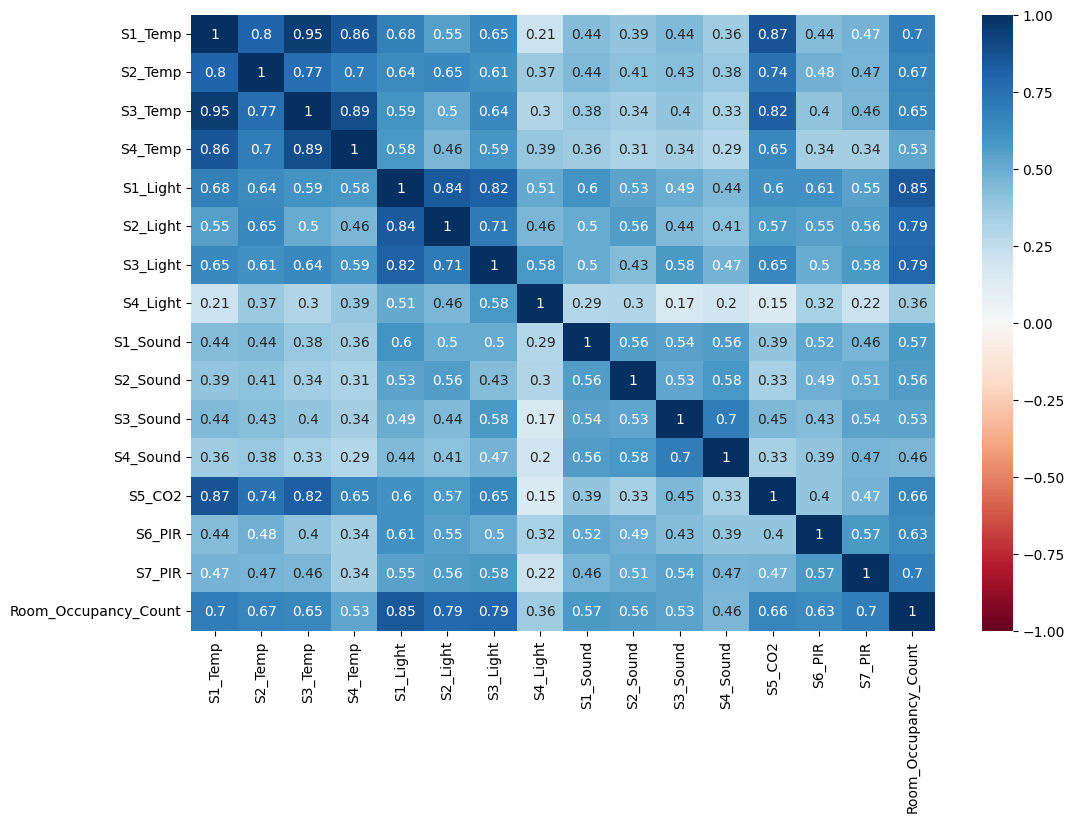

In [ ]:
# Remove categorical / unclear data
# Date/Time is incorporated into Pandas DateTime, and CO2_Slope we recreate with delta CO2
df_v1 = df.drop(columns=['Date', 'Time', 'S5_CO2_Slope'])
corr = df_v1.corr()

# Increase size of plot to fit all the values
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')
# All positively correlated

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   S1_Temp               10129 non-null  float64       
 1   S2_Temp               10129 non-null  float64       
 2   S3_Temp               10129 non-null  float64       
 3   S4_Temp               10129 non-null  float64       
 4   S1_Light              10129 non-null  int64         
 5   S2_Light              10129 non-null  int64         
 6   S3_Light              10129 non-null  int64         
 7   S4_Light              10129 non-null  int64         
 8   S1_Sound              10129 non-null  float64       
 9   S2_Sound              10129 non-null  float64       
 10  S3_Sound              10129 non-null  float64       
 11  S4_Sound              10129 non-null  float64       
 12  S5_CO2                10129 non-null  int64         
 13  S6_PIR          

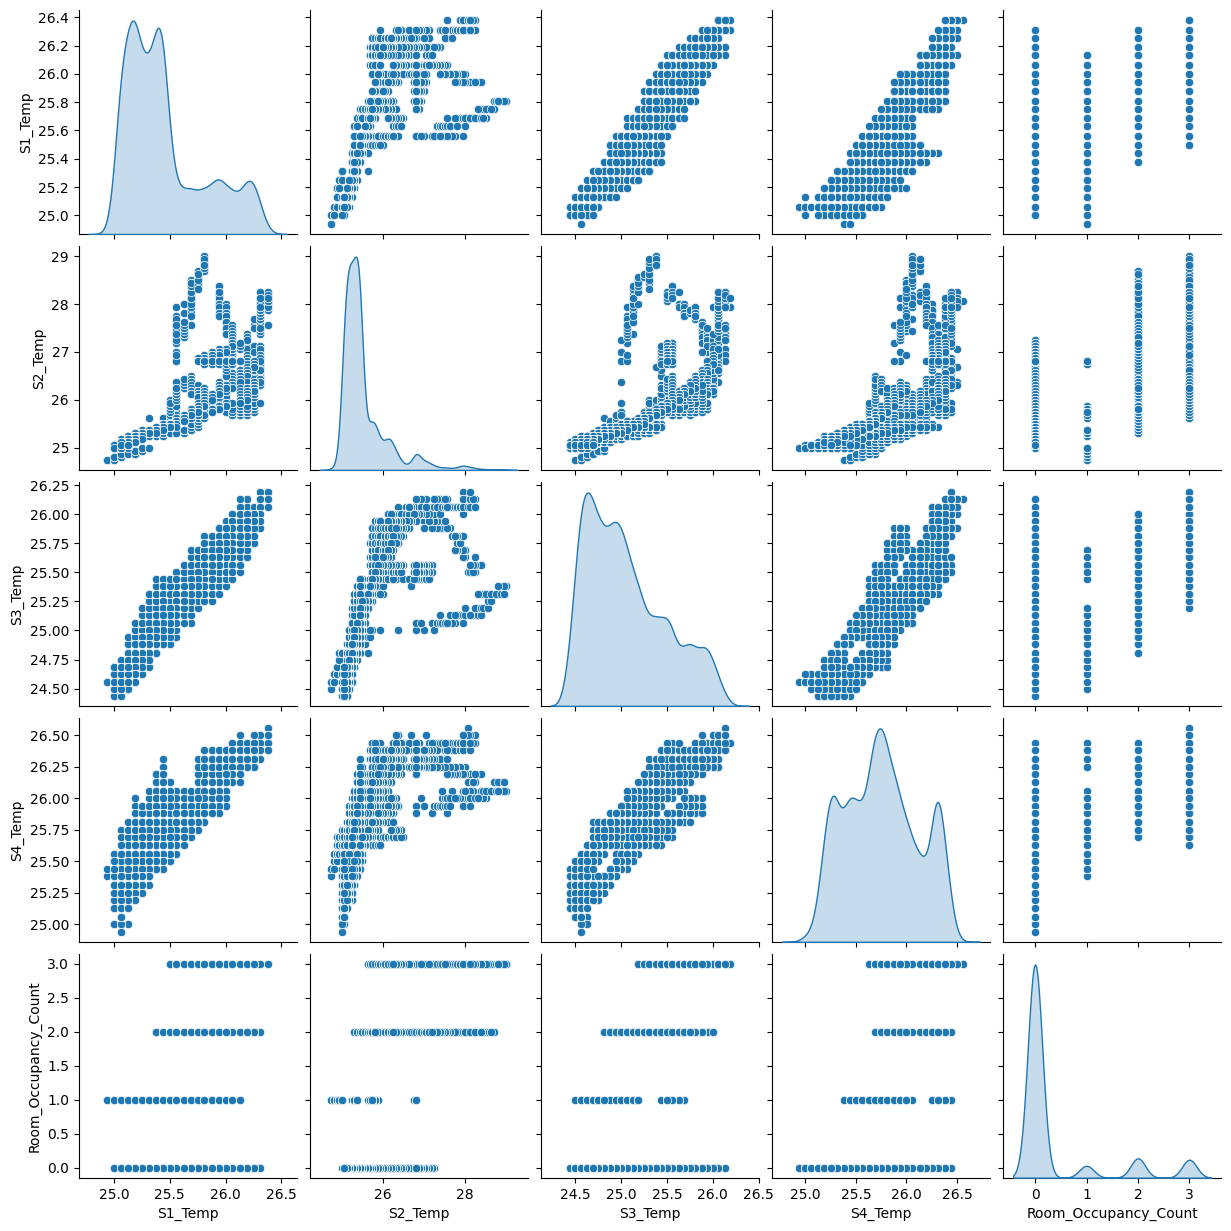

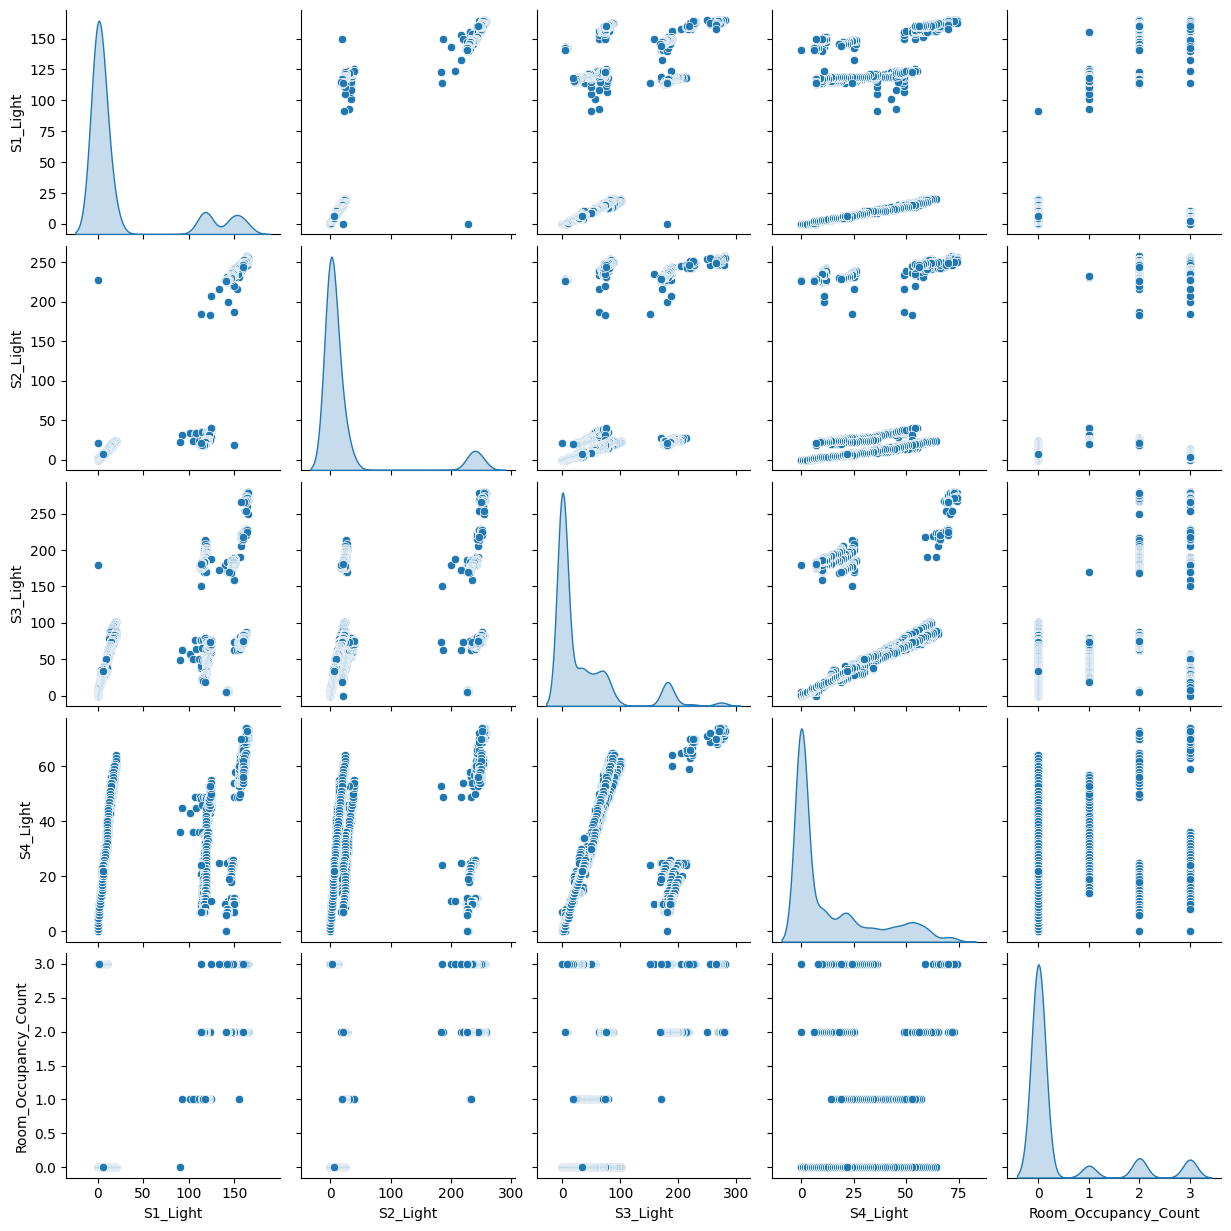

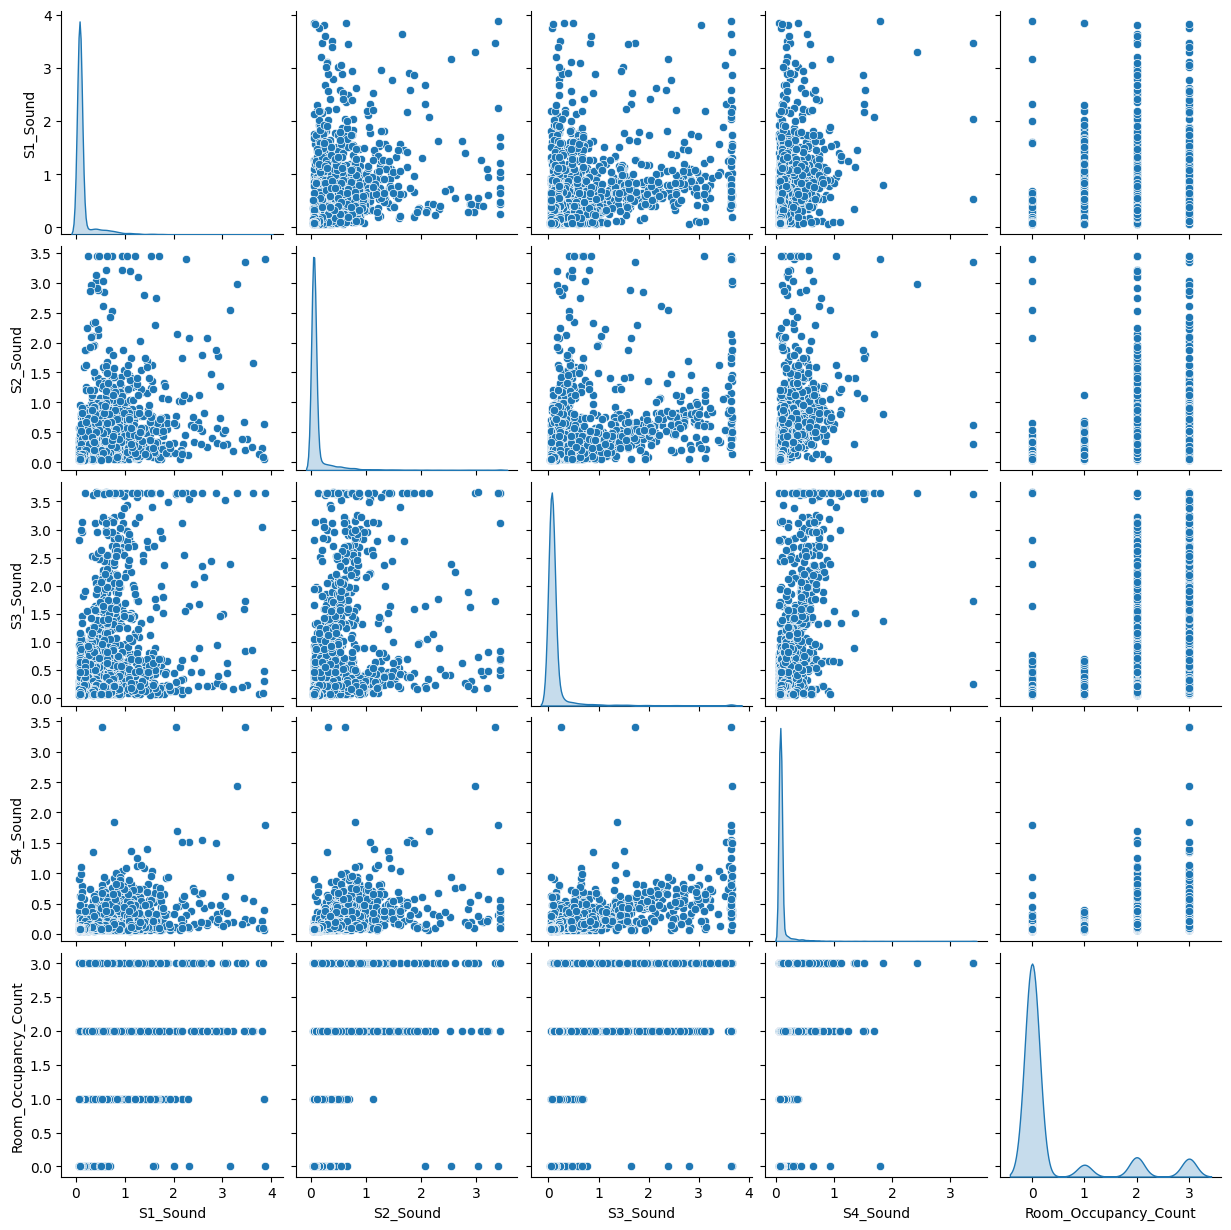

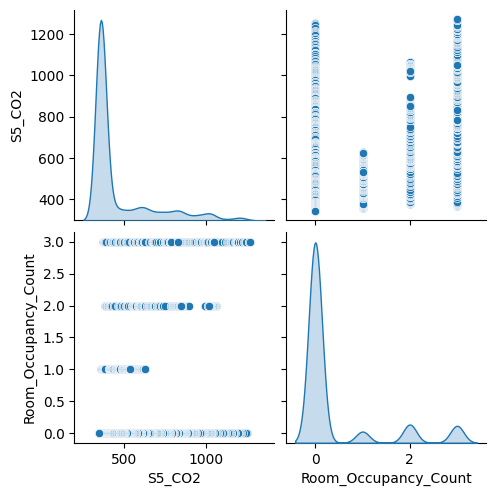

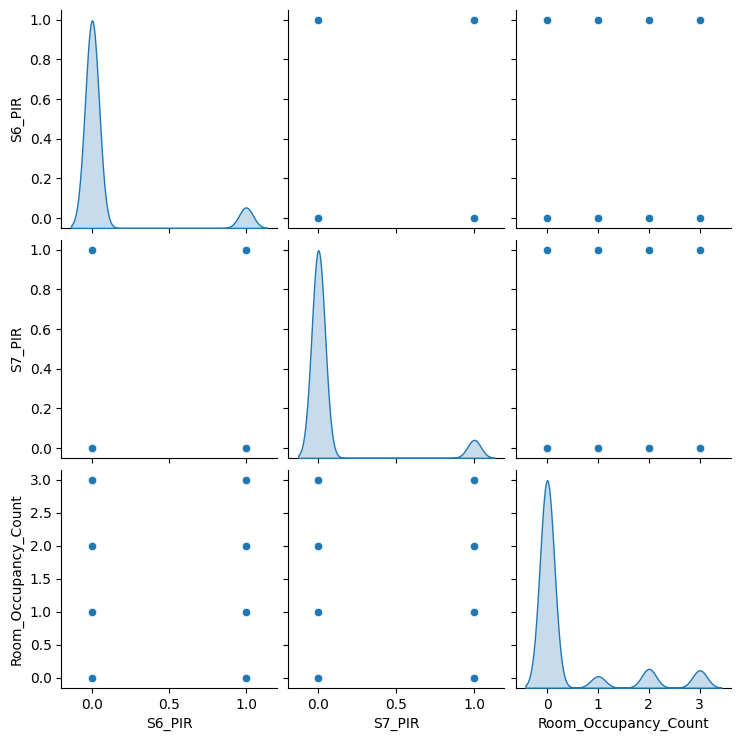

In [ ]:
# Splitting the data into different types along with Room_Occupancy_Count (index 16)
df_v1.info()
df_temp = df_v1.iloc[:, [0, 1, 2, 3, 15]]
df_light = df_v1.iloc[:, [4, 5, 6, 7, 15]]
df_sound = df_v1.iloc[:, [8, 9, 10, 11, 15]]
df_co2 = df_v1.iloc[:, [12, 15]]
df_pir = df_v1.iloc[:, [13, 14, 15]]

# Scatterplots of our different data types grouped into 4 categories

# Temperature Scatter
sns.pairplot(df_temp, diag_kind='kde')
# Won't need transformation


# Light Scatter
sns.pairplot(df_light, diag_kind='kde')


# Sound Scatter
sns.pairplot(df_sound, diag_kind='kde')
# Data is slightly skewed and may benefit from a log transformation


# CO2 Scatter
sns.pairplot(df_co2, diag_kind='kde')

# PIR Scatter
sns.pairplot(df_pir, diag_kind='kde')


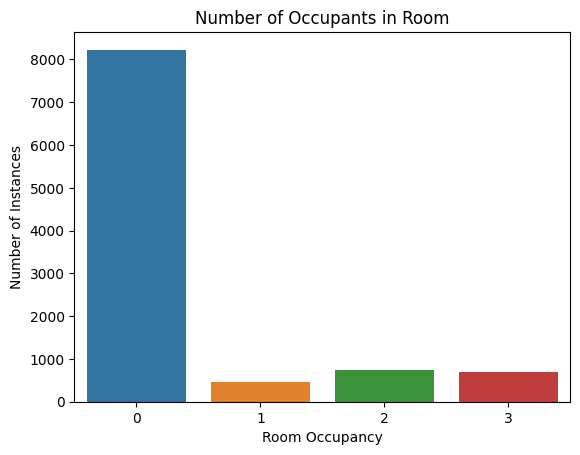

In [ ]:
# Room occupancy count
unq_occupants = df['Room_Occupancy_Count'].value_counts().sort_index()
sns.barplot(x = unq_occupants.index, y = unq_occupants.values)
plt.ylabel('Number of Instances')
plt.xlabel('Room Occupancy')
plt.title('Number of Occupants in Room')
plt.show()

# Proportion of observations that had people inside the room during the measurement
occupants_proportion = (unq_occupants / (unq_occupants.sum())) * 100



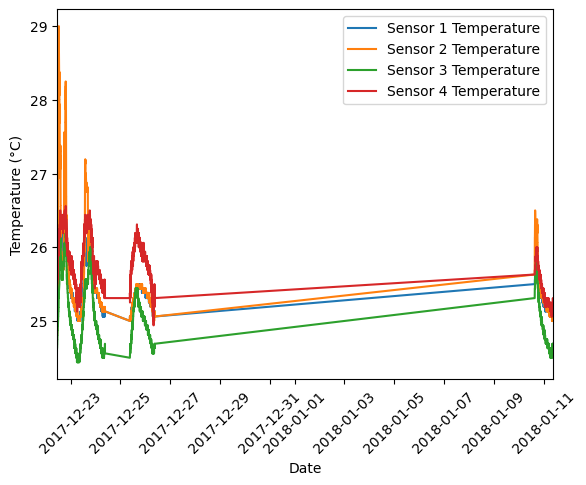

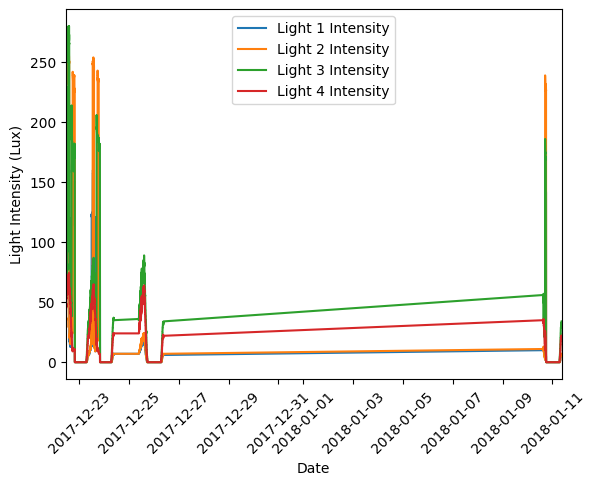

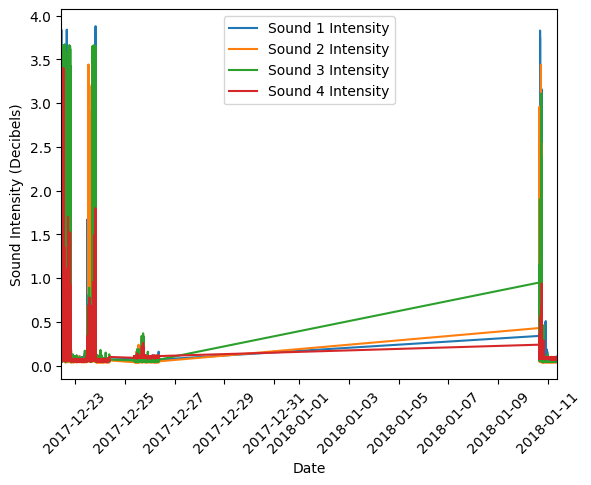

In [ ]:
 # Convert time to datetime for easier plotting

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Temperature against DateTime
plt.plot(df['DateTime'], df['S1_Temp'])
plt.plot(df['DateTime'], df['S2_Temp'])
plt.plot(df['DateTime'], df['S3_Temp'])
plt.plot(df['DateTime'], df['S4_Temp'])
plt.legend(['Sensor 1 Temperature', 'Sensor 2 Temperature', 'Sensor 3 Temperature', 'Sensor 4 Temperature'])

plt.ylabel('Temperature (\u00b0C)')
plt.xlabel('Date')
plt.xlim(df['DateTime'].min(), df['DateTime'].max())
plt.xticks(rotation = 45)
plt.show()

# Light against DateTime
plt.plot(df['DateTime'], df['S1_Light'])
plt.plot(df['DateTime'], df['S2_Light'])
plt.plot(df['DateTime'], df['S3_Light'])
plt.plot(df['DateTime'], df['S4_Light'])
plt.legend(['Light 1 Intensity', 'Light 2 Intensity', 'Light 3 Intensity', 'Light 4 Intensity'])

plt.ylabel('Light Intensity (Lux)')
plt.xlabel('Date')
plt.xlim(df['DateTime'].min(), df['DateTime'].max())
plt.xticks(rotation = 45)
plt.show()

# Sound against DateTime
plt.plot(df['DateTime'], df['S1_Sound'])
plt.plot(df['DateTime'], df['S2_Sound'])
plt.plot(df['DateTime'], df['S3_Sound'])
plt.plot(df['DateTime'], df['S4_Sound'])
plt.legend(['Sound 1 Intensity', 'Sound 2 Intensity', 'Sound 3 Intensity', 'Sound 4 Intensity'])

plt.ylabel('Sound Intensity (Decibels)')
plt.xlabel('Date')
plt.xlim(df['DateTime'].min(), df['DateTime'].max())
plt.xticks(rotation = 45)
plt.show()

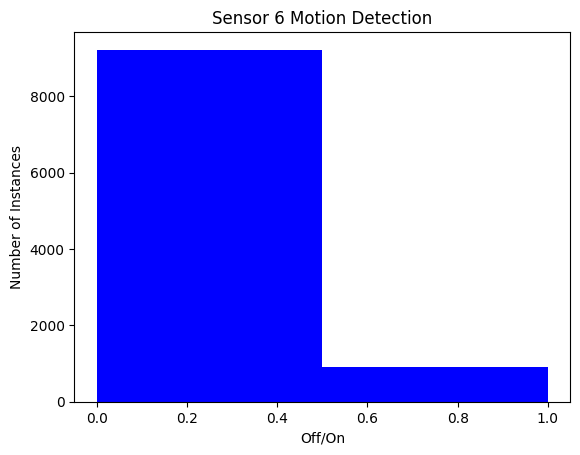

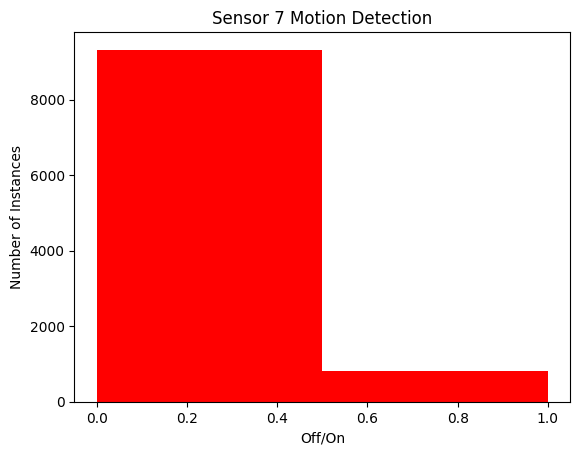

In [ ]:
# Sensor 6 Motion Detection
plt.hist(df['S6_PIR'], bins = 2, color = 'blue')
plt.ylabel('Number of Instances')
plt.xlabel('Off/On')
plt.title('Sensor 6 Motion Detection')
s6_pir_percentage = (df['S6_PIR'] / (df['S6_PIR'].sum())) * 100
plt.show()

# Sensor 7 Motion Detection
plt.hist(df['S7_PIR'], bins = 2, color = 'red')
plt.ylabel('Number of Instances')
plt.xlabel('Off/On')
plt.title('Sensor 7 Motion Detection')
s7_pir_percentage = (df['S7_PIR'] / (df['S7_PIR'].sum())) * 100
plt.show()

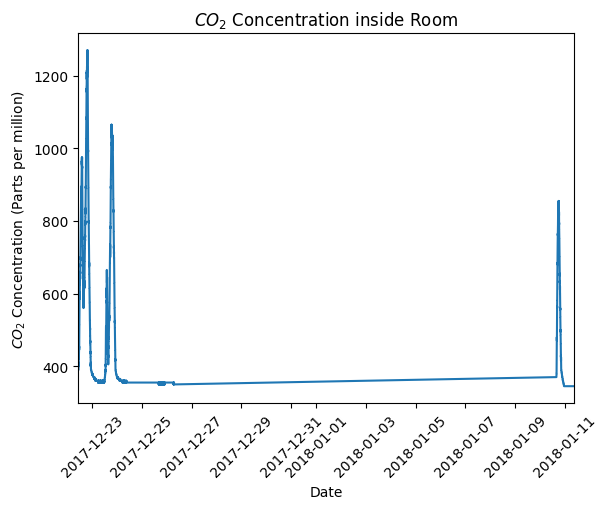

In [ ]:
# CO2 Concentration
plt.plot(df['DateTime'], df['S5_CO2'])
plt.xlim(df['DateTime'].min(), df['DateTime'].max())
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('$CO_{2}$ Concentration (Parts per million)')
plt.title('$CO_{2}$ Concentration inside Room')
plt.show()

# CO2 Slope
plt.plot(df['DateTime'], df['S5_CO2_Slope'])
plt.xlim(df['DateTime'].min(), df['DateTime'].max())
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('$CO_{2}$ Slope')
plt.title('Sensor 5 $CO_{2}$ Rate of Change over time')
plt.show()